In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
data = pd.read_csv('data-csv/chs2016_public.csv')

In [5]:
# amount of columns in chs2016_public.csv

len(data.columns)

147

In [6]:
# amount of rows in chs2016_public.csv

len(data)

10000

In [7]:
# filter to only grab the columns we need

data = data[['daysalc30', 'mood54', 'exercise16', 'fruitveg', 'mood63']]

In [8]:
# rename columns for easier understanding

data.columns = ['alcohol', 'sleep', 'exercise', 'nutrition', 'mood']

In [9]:
# drop an row with one or more NaN values

data = data.dropna()

In [10]:
# amount of rows after dropping null values (9371 out of 10,000 is excellent)

len(data)

9371

In [11]:
# how many mood data points are 1?

(data['mood'] == 1).sum()

7189

In [12]:
# how many mood data points are 2?

(data['mood'] == 2).sum()

1265

In [13]:
# how many mood data points are 3?

(data['mood'] == 3).sum()

348

In [14]:
# how many mood data points are 4?

(data['mood'] == 4).sum()

569

In [16]:
# how many mood data points are marked as 'don't know?'

(data['mood'] == '.d').sum()

0

In [17]:
# how many mood data points are marked as 'refused'?

(data['mood'] == '.r').sum()

0

In [8]:
# split data into 80% training and 20% test

train, test = train_test_split(data, test_size = 0.2)

In [9]:
# check the first few rows of the training set

train.head()

,alcohol,sleep,exercise,nutrition,mood
9683,1.0,1.0,1.0,2.0,1.0
2177,12.9,1.0,1.0,2.0,1.0
9812,10.0,4.0,2.0,2.0,4.0
1168,0.0,1.0,1.0,2.0,1.0
5538,4.3,1.0,1.0,2.0,1.0


In [38]:
# alcohol, sleep, exercise, nutrition are training variables
# mood is the training target variable

train_x = train.iloc[:, 0:4]
train_y = train.iloc[:, 4]

In [39]:
# check the first few rows of the training variables

train_x.head()

,alcohol,sleep,exercise,nutrition
9683,1.0,1.0,1.0,2.0
2177,12.9,1.0,1.0,2.0
9812,10.0,4.0,2.0,2.0
1168,0.0,1.0,1.0,2.0
5538,4.3,1.0,1.0,2.0


In [40]:
# alcohol, sleep, exercise, nutrition are test variables
# mood is the test target variable

test_x = test.iloc[:, 0:4]
test_y = test.iloc[:, 4]

In [41]:
# train using Bayesian Ridge Regression

from sklearn.linear_model import BayesianRidge
BayesianRidge = BayesianRidge(compute_score = True)
BayesianRidge.fit(train_x, train_y)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=True, copy_X=True,
              fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [42]:
# predict test target variable using Bayesian Ridge Regression

BayesianRidge_pred_y = BayesianRidge.predict(test_x)

In [43]:
# calculate Bayesian Ridge Regression RMSE

BayesianRidge_RMSE = sqrt(mean_squared_error(test_y, BayesianRidge_pred_y))
BayesianRidge_RMSE

0.7510363168045816

In [44]:
# train using Random Forest Regressor on training set

from sklearn.ensemble import RandomForestRegressor
RandomForest = RandomForestRegressor()
RandomForest.fit(train_x, train_y)

C:\Users\pishi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [45]:
# predict test target variable using Random Forest Regressor

RandomForest_pred_y = RandomForest.predict(test_x)

In [46]:
# calculate Random Forest Regression RMSE

RandomForest_RMSE = sqrt(mean_squared_error(test_y, RandomForest_pred_y))
RandomForest_RMSE

0.7750599250224139

In [47]:
# train using Linear Regressor

from sklearn.linear_model import LinearRegression
LinearRegression = LinearRegression()
LinearRegression.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
# predict test target variable using Linear Regression

LinearRegression_pred_y = LinearRegression.predict(test_x)

In [49]:
# calculate Linear Regression RMSE 

LinearRegression_RMSE = sqrt(mean_squared_error(test_y, LinearRegression_pred_y))
LinearRegression_RMSE

0.7510221124190567

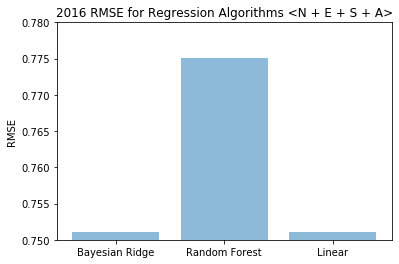

In [50]:
# plot RMSE values

import numpy as np
import matplotlib.pyplot as plt
models = ('Bayesian Ridge', 'Random Forest', 'Linear')
y_pos = np.arange(len(models))
rmse = [BayesianRidge_RMSE, RandomForest_RMSE, LinearRegression_RMSE]

plt.bar(y_pos, rmse, align = 'center', alpha = 0.5)
plt.xticks(y_pos, models)
plt.ylabel('RMSE')
plt.title('2016 RMSE for Regression Algorithms <N + E + S + A>')
plt.ylim(0.75, 0.78)

plt.show()